Using TensorFlow backend.


image path are:  ['./train_image/0a0c223352985ec154fd604d7ddceabd.jpg', './train_image/0a1b0b7df2918d543347050ad8b16051.jpg', './train_image/0a001d75def0b4352ebde8d07c0850ae.jpg', './train_image/0a1f8334a9f583cac009dc033c681e47.jpg', './train_image/0a3f1898556115d6d0931294876cd1d9.jpg', './train_image/0a70f64352edfef4c82c22015f0e3a20.jpg', './train_image/0a65ba3ab9b29c66e15cec76f34eca6f.jpg', './train_image/0a27d304c96918d440e79e6e9e245c3f.jpg']
[[[[ -48.939003    -60.779       -29.68      ]
   [ -21.939003    -33.779        -2.6800003 ]
   [ -12.939003    -24.779         6.3199997 ]
   ...
   [ 151.061       138.22101     131.32      ]
   [ 151.061       138.22101     131.32      ]
   [ 151.061       138.22101     131.32      ]]

  [[ -28.939003    -41.779        -8.68      ]
   [ -33.939003    -46.779       -13.68      ]
   [ -27.939003    -40.779        -7.6800003 ]
   ...
   [ 151.061       138.22101     131.32      ]
   [ 151.061       138.22101     131.32      ]
   [ 151.061     

predicts_result 
 [[2.1748718e-09 4.3184980e-09 4.8918029e-08 ... 2.2445090e-09
  2.3270083e-07 1.9769009e-06]
 [7.7904003e-09 9.7983008e-09 7.5258413e-09 ... 2.8745069e-09
  1.4264033e-08 1.8351039e-07]
 [7.9920220e-12 7.6810495e-11 2.8159433e-09 ... 7.4623463e-10
  5.4683991e-09 2.3756723e-08]
 ...
 [7.2502271e-09 6.3777392e-08 1.7645303e-06 ... 6.4141055e-08
  2.7684462e-07 2.5240308e-05]
 [1.5649382e-09 1.0085921e-09 1.2149408e-09 ... 5.1766680e-10
  5.8506506e-09 1.5053374e-08]
 [8.4966658e-08 1.7902745e-07 2.1359250e-07 ... 1.2691534e-07
  8.8224715e-06 6.2686863e-04]]


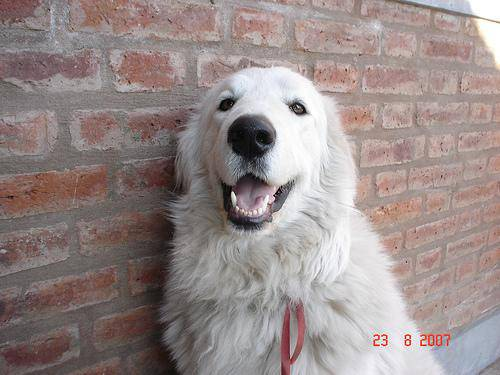

[('n02111500', 'Great_Pyrenees', 0.47494158), ('n02104029', 'kuvasz', 0.32954386), ('n02090721', 'Irish_wolfhound', 0.11096154)]


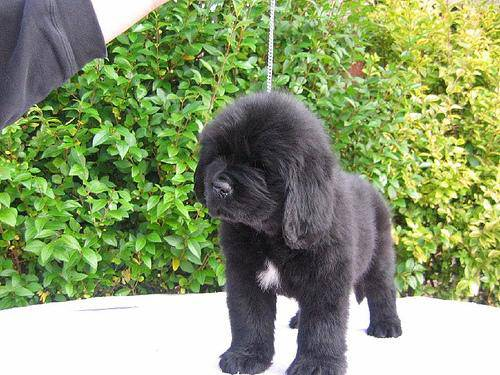

[('n02111277', 'Newfoundland', 0.5745532), ('n02480855', 'gorilla', 0.25875145), ('n02113799', 'standard_poodle', 0.11722645)]


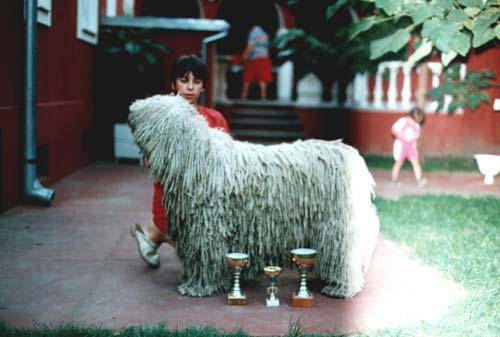

[('n02105505', 'komondor', 0.99127275), ('n04367480', 'swab', 0.008316364), ('n02437616', 'llama', 9.132501e-05)]


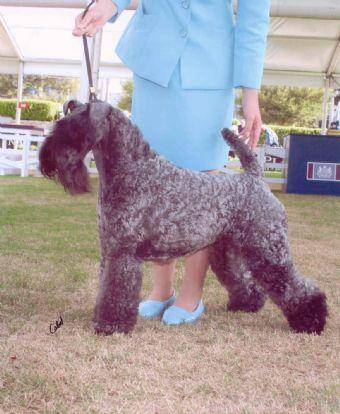

[('n02093859', 'Kerry_blue_terrier', 0.99965954), ('n02106382', 'Bouvier_des_Flandres', 0.00012802934), ('n02095570', 'Lakeland_terrier', 9.0364854e-05)]


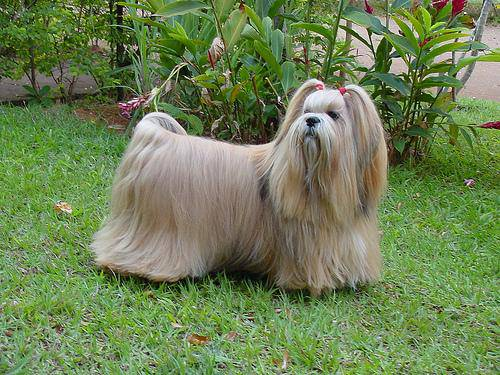

[('n02098413', 'Lhasa', 0.91339165), ('n02097474', 'Tibetan_terrier', 0.0636456), ('n02088094', 'Afghan_hound', 0.008584874)]


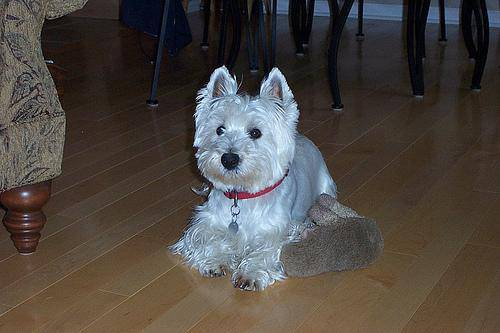

[('n02098286', 'West_Highland_white_terrier', 0.7587863), ('n02097298', 'Scotch_terrier', 0.13975029), ('n02096177', 'cairn', 0.033762272)]


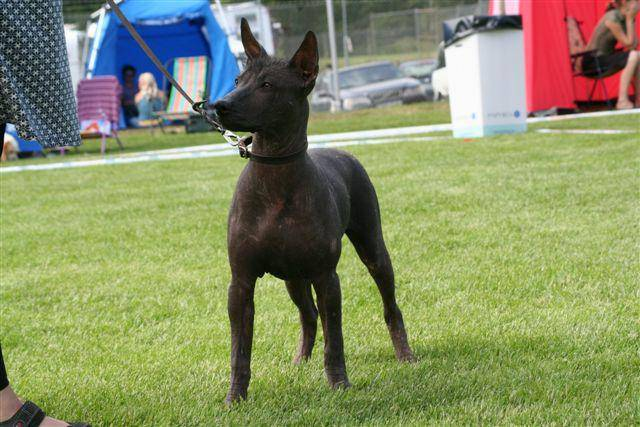

[('n02113978', 'Mexican_hairless', 0.9892396), ('n02087046', 'toy_terrier', 0.0040932493), ('n02091032', 'Italian_greyhound', 0.0017458084)]


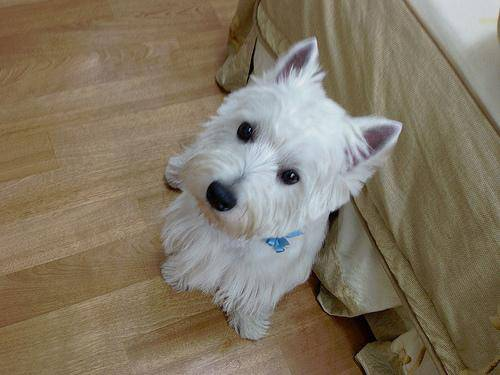

[('n02098286', 'West_Highland_white_terrier', 0.69795734), ('n02097047', 'miniature_schnauzer', 0.11126591), ('n02097298', 'Scotch_terrier', 0.0881239)]


In [2]:
# we are going to use pre trained deep learnig model first
# install virtualenv, sudo pip3 install -U virtualenv, if not present
# for check virtulaenv --version

# install tensorflow sudo pip3 install -U tensorflow
#install keras
#install pillow, if get PIL error, its a dependency for load_img of keras

from os.path import join
import numpy as np
from keras.applications.resnet50 import preprocess_input 
#preprocess_input, perform mathmathical operation on image pixel value, so all value should be 1 and -1

from keras.preprocessing.image import load_img, img_to_array
#load_img, use to load images, we are pass two params, 1. image path, 2. target_size: image size
#img_to_array, convert an image into array and te array is 3Tensor array of a image

from keras.applications import ResNet50
#Resnet50 is the model for image detection

from learntools.deep_learning.decode_predictions import decode_predictions
from IPython.display import Image, display

image_dir = './train_image/'

img_list = ['0a0c223352985ec154fd604d7ddceabd.jpg', '0a1b0b7df2918d543347050ad8b16051.jpg', '0a001d75def0b4352ebde8d07c0850ae.jpg',
            '0a1f8334a9f583cac009dc033c681e47.jpg', '0a3f1898556115d6d0931294876cd1d9.jpg', '0a70f64352edfef4c82c22015f0e3a20.jpg',
            '0a65ba3ab9b29c66e15cec76f34eca6f.jpg', '0a27d304c96918d440e79e6e9e245c3f.jpg']

img_paths = [join(image_dir, filename) for filename in img_list]

print('image path are: ', img_paths)

#conside each image is 224 X 224
image_size = 224

#function for prepare data for model
def  read_and_prep_images(img_paths, img_height=image_size, img_width=image_size):
    imgs = [load_img(img_path, target_size=(img_height, img_width)) for img_path in img_paths]
    #load each image present in image_paths array
    img_array = np.array([img_to_array(img) for img in imgs])
    #craete array of 3Tenser of each image, combine of multiple 3Tenser array is 4Dimensional array
    output = preprocess_input(img_array)
    #procees arithmathic operation on all input pixel value, and the vaule are in -1 or 1
    return output

#craete a model with pre-trained weight data
img_detect_model = ResNet50(weights='./pretrained_weight.h5')

#get test data
test_data = read_and_prep_images(img_paths)
print(test_data)

#prediction
predicts_result = img_detect_model.predict(test_data)
print('predicts_result \n', predicts_result)
#it will predict the probability with each image present in pre_trained file, so we need to find higest probality
#of each image to know actual image

most_likely_labels = decode_predictions(predicts_result, top=3, class_list_path='../input/resnet50/imagenet_class_index.json')
for i, img_path in enumerate(img_paths):
    display(Image(img_path))
    print(most_likely_labels[i])